<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8. Deep Learning SRNN</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [1]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [2]:
experimento_1_nor = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_2_nor = pd.read_csv('../datos/experimento_stscaler_2.csv', sep=',')
experimento_3_nor = pd.read_csv('../datos/experimento_stscaler_3.csv', sep=',')
experimento_4_nor = pd.read_csv('../datos/experimento_stscaler_4.csv', sep=',')
experimento_all_nor = pd.read_csv('../datos/experimento_stscaler_all.csv', sep=',')

experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}

experimentos = [("experimento_1", experimento_1_nor), 
                ("experimento_2", experimento_2_nor), 
                ("experimento_3", experimento_3_nor), 
                ("experimento_4", experimento_4_nor)]

In [3]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [4]:


# Plot del training loss y accuracy
def print_chart(title, xaxis, yaxis, lines_values, lines_titles):
    """
    Visualización de la pérdida
    IN: title - título de la gráfica
        xaxis - título del eje X
        yaxis - título del eje Y
        lines - lista de series de valores
    """
    for line in lines_values:
        plt.plot(line)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.legend(lines_titles, loc='best')
    plt.show()
    

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False):
      self.showLR = showLR              

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
        if self.showLR:
          metric.append('lr')
        
        f, axs = plt.subplots(1,len(metric),figsize=(10,4))
        clear_output(wait=True)
        for i,ax in enumerate(axs):
          ax.plot(range(1, epoch + 2), self.metrics[metric[i]],'o--',label=metric[i])
          try:
            ax.plot(range(1, epoch + 2), self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
          except:
            pass
          ax.set_xlabel('# epochs')
          ax.set_ylabel(metric[i])
          ax.legend()
          ax.grid()

        plt.tight_layout()
        plt.show()
        
class TimerCallback(Callback):
    
    def on_train_begin(self, logs={}):
        self.times = []
        self.start_time = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.start_time)
        print(f"Tiempo requerido: {self.times[-1]:.2f} segundos.")
        

# Simple RNN (Simple Recurrent Neural Networks)

In [5]:
experimento_prueba = experimento_1_nor.drop(['Timestamp'], axis=1)
#print(experimento_1_scaler['Key'].unique())

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_prueba)

In [7]:

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [8]:
model_srnn = Sequential([
    SimpleRNN(128),  # Capa RNN
    #Dense(128),  # Capa RNN
    Dense(5, activation='softmax')  # Capa de salida con activación softmax para num_classes clases
    ])

# Compilar el modelo
model_srnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model_srnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Definir early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
plot_learning = PlotLearning()
timer_callback = TimerCallback()
reduce_rl = ReduceLROnPlateau(patience=5, monitor='loss')
model_checkpoint = ModelCheckpoint('weights/simple_rnn.keras', monitor='val_loss', save_best_only=True)

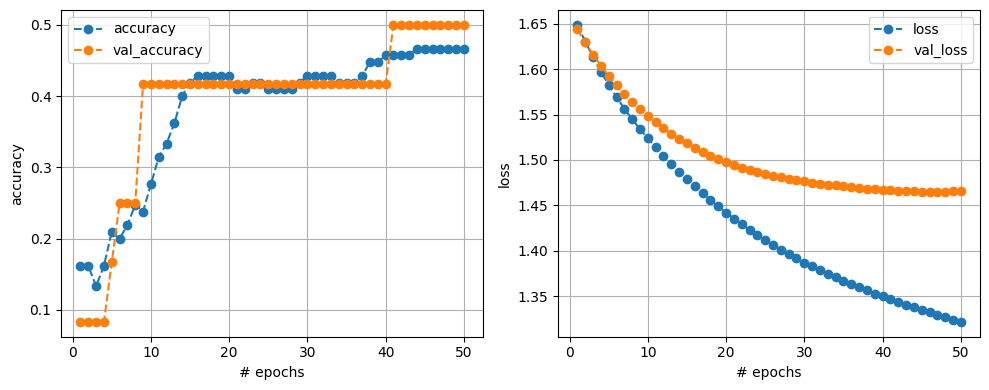

Tiempo requerido: 46.07 segundos.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.4667 - loss: 1.3216 - val_accuracy: 0.5000 - val_loss: 1.4656 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
***
[[0.1895043  0.2312093  0.20761003 0.21066843 0.16100787]
 [0.50332433 0.03109896 0.27531996 0.09316718 0.09708951]
 [0.139331   0.25474817 0.22791092 0.22035538 0.15765464]
 [0.26431865 0.24809751 0.1501491  0.19855088 0.13888384]
 [0.13731061 0.1072525  0.19387157 0.17651139 0.38505387]
 [0.13467868 0.21413924 0.29592514 0.22505131 0.13020559]
 [0.06767298 0.11295997 0.3385408  0.18757975 0.29324657]
 [0.14792451 0.22899893 0.22153601 0.22151867 0.18002196]
 [0.2557438  0.1734917  0.1192975  0.18495871 0.26650837]
 [0.15663461 0.24202254 0.22069712 0.21869175 0.16195397]
 [0.14601494 0.21519315 0.254298   0.2162752  0.16821873]
 [0.23485295 0.11498026 0.12186008 0.16446143 0.3638453 ]]
***
[1 0 1 0 4 2 2 1 4 1 2 4]
***
Accuracy: 0.5
Classification Report:
              pr

In [9]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

n_folds = CV

# Entrenar el modelo
simple_rnn_trained = model_srnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data= (X_val, y_val), callbacks=[early_stopping, plot_learning, timer_callback, reduce_rl, model_checkpoint])

y_pred = model_srnn.predict(X_val)
print('***')
print(y_pred)
print('***')
y_pred_classes = np.argmax(y_pred, axis=1)
print (y_pred_classes)
print('***')

# Calcula la precisión
accuracy = accuracy_score(y_val, y_pred_classes)
print("Accuracy:", accuracy)

# Muestra el informe de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

# Muestra la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_classes))   
    

 
print('********************************************************')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4615 - loss: 1.3339
Loss: 1.3339146375656128
Accuracy: 0.4615384638309479


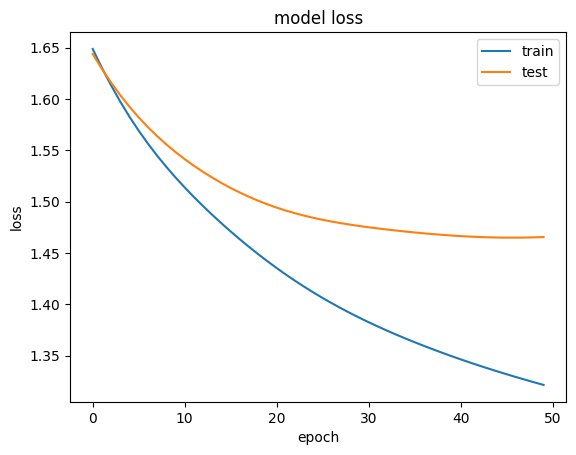

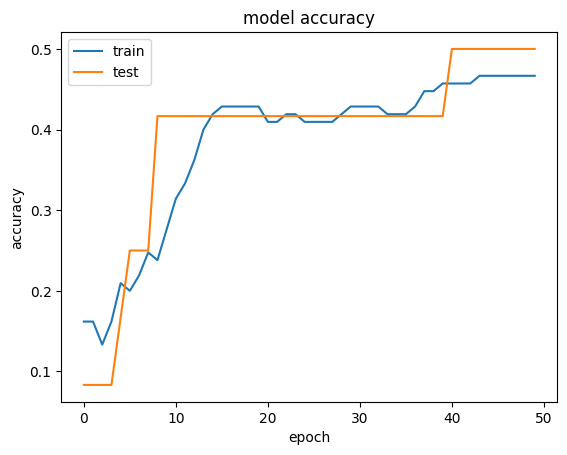

In [10]:
simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
print(f'Loss: {simple_rnn_loss}')
print(f'Accuracy: {simple_rnn_accuracy}')

print_chart("model loss", "epoch", "loss", [simple_rnn_trained.history['loss'], simple_rnn_trained.history['val_loss']], ['train', 'test'])
print_chart("model accuracy", "epoch", "accuracy", [simple_rnn_trained.history['accuracy'], simple_rnn_trained.history['val_accuracy']], ['train', 'test'])
